In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sqlalchemy import create_engine
import seaborn as sns
from scipy import stats

In [2]:
# load data from the database
database_filepath = './data/FinancialRatios.db'
engine = create_engine('sqlite:///{}'.format(database_filepath))
financial_ratios = pd.read_sql_table('FinancialRatiosTable', engine)
financial_ratios

,Symbol,fiscalDateEnding,StockPriceOnFiscalDateEnding,StockPrice45daysLater,StockPrice90daysLater,EPS
0,A,2020-07-31,96.33,NaN,NaN,NaN
1,A,2020-04-30,76.66,86.96,97.10,1.311688
2,A,2020-01-31,82.56,64.13,76.66,2.541935
3,A,2019-10-31,75.75,84.45,87.24,2.440252
4,A,2019-07-31,69.41,77.15,76.17,2.464516
...,...,...,...,...,...,...
9918,ZTS,2016-09-30,52.01,48.96,53.62,1.934280
9919,ZTS,2016-06-30,47.46,52.38,51.75,1.808677
9920,ZTS,2016-03-31,44.33,46.77,47.24,1.643780
9921,ZTS,2015-12-31,47.92,40.43,44.02,0.176920


# EPS analysis

In [3]:
def get_indicator_change(df, indicator):
    """
    This function aims to calculate the percentage change of an indicator compared with its previous record
    in the dataset for each symbol available in the dataset.
    :param df: the dataframe load from FinancialRatiosTable in the database
    :type df: pd.DataFrame
    :param indicator: column name of the indicator that should be focused on
    :type indicator: str
    :return: a list of percentage change of the indicator relative to its previous record
    :rtype: list
    """
    indicator_change_list = []

    # get the available symbol in df
    symbol_list = df.Symbol.unique().tolist()

    for symbol in symbol_list:
        # calculate the percentage change of the selected indicator within the same symbol only
        df_selected_symbol = df[df.Symbol == symbol]

        for idx in range(df_selected_symbol.shape[0] - 1):
            # only process the non-NaN and non-zero values, else set NaN as result
            if (df_selected_symbol.iloc[idx + 1][indicator] != np.nan) | (df_selected_symbol.iloc[idx + 1][indicator] != 0):
                indicator_change = ((df_selected_symbol.iloc[idx][indicator] - df_selected_symbol.iloc[idx + 1][indicator]) / df_selected_symbol.iloc[idx + 1][indicator]) * 100
                indicator_change_list.append(indicator_change)
                print(indicator_change)
            else:
                indicator_change_list.append(np.nan)

        indicator_change_list.append(np.nan)

    return indicator_change_list

In [4]:
# calculate EPS growth for each quarter
EPS_change = get_indicator_change(financial_ratios, 'EPS')

nan
-48.39804865185576
4.166943797805128
-0.9845566202377405
7.314781992201344
-63.77497371188223
164.15094339622644
-18.89830508474576
16.20460279837907
-164.26145186335404
-282.4701334592713
-0.09815950920245343
6.375927889713686
-2.0768431983385334
36.23188405797101
92.43111266131847
33.847229442661735
-26.01626016260163
-51.90826330532212
-23.302084448388552
-648.1089137634613
-0.3513762539040102
-34.74139030208787
256.99711543282456
-39.86590116779624
-6.46205205568605
-39.760155464646495
208.85293937665313
-26.65490088187322
-58.26325912558094
-21.05097884188776
248.85375553173148
-17.145650932142125
-59.109147000713634
-21.227085940901407
47.97256025951751
-77.2456189248058
111.28995114982358
nan
-54.398994073818194
-20.468178677068806
0.4733351237048953
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.9707317090997486
-48.697514200466415
64.63189374515017
38.9640208091935
-11.66671829400504
-40.553792180217165
42.09769991748742
24.891091620067957
-14.93473680301987

-28.718956893251306
140.1210694467799
-69.56565402962592
95.62503746592803
9.948468097067376
-34.30105976497729
-502.9529529529529
-138.92159273347895
31.527313266443702
-31.693586220762683
-21.798155737704917
94.2202666548743
16.139898989898978
-16.50237495112841
-17.654172930425826
66.07570142343604
104.54657743442328
12.723117244463221
-52.071304347826086
-21.84310294546515
18322.059847821118
-99.49476069119754
-38.67781155015197
21.683440073193047
36.28428927680796
-38.9727330374128
14.482758620689658
1.8437225636523151
57.756232686980624
652.0833333333333
-89.30957683741649
-14.881516587677718
54.23976608187133
-7.603609625668451
4575.0
-98.3157894736842
64.64471403812824
-19.749652294853966
-360.6548091084174
nan
-36.71530968942783
90.11976047904191
2.1483736890435514
-21.78941996938255
-1400.6637168141592
-113.59927470534905
-171.70062673079727
-284.4444484448949
725.7823550212165
-61.15384615384616
-52.51717171717172
-2.9411764705882253
74.26424610211883
3.407958616888211
-17.9

80.73214153252725
-114.77270751297426
429.0088842939001
-40.70138066837361
-17.370036024244754
12.672759503663746
1.6120731231725565
-197.81674962205201
-251.8686065305196
-33.29479509640464
57.4599640494056
-23.292406480796814
-310.05822120419424
-155.07551734293477
-10.107175851930092
8.14997577294364
80.13959702250003
-29.71714356528972
11.04106042639263
-10.36383530295585
56.48832110176967
nan
nan
26.530612244897977
-59.166666666666664
41.17647058823528
50.44247787610621
0.33543804262035504
-39.774212715389176
14.156605961394161
52.83018867924528
-10700.000000000002
-100.49261083743843
54.961832061068726
40.86021505376344
-7.920792079207932
-32.13800392571343
10.226197178709098
66.87825111583486
-17.80467738564027
-43.075666785513015
-28.52852852852853
-79.82731348697372
-2.2892170560965264
-0.8469470825802837
14.295673076923068
-21.96425281002395
22.527906302777144
2.7453713523832546
-0.788556757748021
-236.34920634920636
-189.50750512532582
2.8205699401956865
9.550625944854746
51

-4.37318824493774
20.194359918318888
-29.722212937104754
-2291.5361009782355
-105.37804440068443
19.87024700379923
-46.80011023119577
50.44105756175976
87.21785941918714
65.11643119626439
-55.067545083774014
30.327160963830856
-52.452859714216984
-73.02566969245387
149.23256503243843
14.887200046351007
36.056278531335245
-58.169862467863354
37.1686375272798
26.62192432907866
52.127629175033206
-10.82845444837275
-14.220368078159309
-0.8786894172912554
52.112141929376264
-50.99204638045046
153.4248627009691
-14.82004602060634
47.94923468708534
-54.507122505516136
21.7349933040999
9.554140127388534
52.06165164955413
-57.786885245901644
11.926605504587155
19.780219780219785
-1.3247282608695592
35.29411764705881
-10.526315789473676
76.74418604651162
20.715611614426756
-18.19750156251422
-31.47027781996271
-7.119361808874249
-4.684323220944556
33.81696774080006
14.524771936899612
106.79348791365939
-72.34402849189927
41.267753113300806
nan
-286.7930266959756
-76.27029616158991
295.820832303

-87.28110401734315
666.8390675687546
25.182370317713143
-29.69780329269749
89.97747231238331
-43.57550402120862
-9049.992435715685
-101.29850049643794
-122.22255700360046
798.7012987012988
-29.10332823583724
-236.78248464380948
-16.38721769882722
-16.33549479808448
13.545947284774307
14.556795270403509
-17.57761400560857
-19.818237924283796
43.478459274900615
107.28025831381119
-41.013355414937195
10.277319900375522
25.822178926681293
4.1828266003205705
-23.96478917936782
14.219100675430068
-8.687938567970189
18.344846329166582
-20.123451675714616
nan
-61.752296855859534
61.449874607496554
-48.87516069009086
-30.950739632723064
0.7050200310196388
122.31566288203895
194.82820947438609
-63.08655560389316
-366.0740915213137
-352.15007134366465
-17.9512100582864
-79.63772228528188
-135.33822531658384
2803.3616133696755
-83.69098712446352
14.164588340115467
-56.922920453181845
634.1175712259895
nan
-25.20661157024793
0.7493755203996583
-10.23916292974589
58.5308056872038
-16.186693147964245

nan
nan
nan
79.71083873916322
-22.410018404636318
4.957870656802952
-21.62973664538685
51.76364621976928
-9.056059285764961
nan
-60.57971014492753
18.539671682626544
-5.561656223758162
37.8048780487805
31.98239925891616
-40.375586854460096
-2.7397260273972575
23.728813559322024
-29.81362941143148
57.76397515527951
-16.58031088082902
18.523519163763076
5.8737952354973455
-18.749999999999993
-1.5384615384615365
93.86909693454845
-45.36790780141843
-45.02923976608187
30.626587505276536
12.759563215668045
-12.14502101058897
4.376641916294802
36.3923762899746
22.35470491435593
-37.89715058750494
2.9322143407198324
29.43053493478206
84.57712413179249
-39.69252514898239
8.187943574539917
26.531327650504267
10.131054282681372
-27.15184226614428
14.507876158665766
26.2427165438891
23.380901537631736
-33.940407119567375
52.44888698760195
-54.260336299336
99.95026190665203
-8.610292312774602
116.04588855013509
-57.04856507631779
12.408437074561268
-1.6535717649913042
18.715922879761745
-34.034697

c:\users\egg_o\desktop\stock-analysis\venv\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.



-53.609434857062595
3.170206936849023
-24.590329032697348
61.5735473942416
-1387.3539016514912
-105.65106063587486
-13.985554895756094
-15.129517931466497
-58.556073583169386
519.3178232923731
-28.589621958543265
-78.1727951801631
337.42881578476954
100.89902863625768
-51.65689559416799
41.159318968852105
-32.47139917072729
-111.63602463473048
-0.034300835531783966
-918.665720369056
2.841035647555843
70.58247201957943
nan
nan
2.479237464096946
16.559235357552055
-37.823242809672266
87.36254231022576
0.6943974187894633
-26.88964780274869
1.3431687016703686
180.83725478569045
nan
5.569997032487672
-18.3897556381853
3.9987883989196544
87.39416300080413
-22.7929983023951
-11.780366334927614
16.165227870424747
8.559724598450973
-55.38098904189081
65.69486675013415
9.054115008106878
-5.3570406289525465
6.878172273861082
23.890716767627072
9.97041170005918
18.298402219849986
-25.85214439959853
-27.68451384291626
nan
nan
nan
344.30327501121576
nan
nan
nan
-21.813917122752148
nan
nan
nan
nan
n

56.122884433790944
-31.64686419010377
26.430205949656738
-23.993513620688432
-53.794976797150426
174.09228755317986
19.743978388187745
-14.589800443458973
-2.217615839602585
6.9844928002286855
22.065372476112223
-24.25825433148087
21.15442507457551
nan
-69.7807850559552
7.022320904910867
49.85060738334517
-8.073624197952466
-468.0247237223344
-112.35667860621102
117.37536013979883
82.83893860296963
889.719695840167
-96.6499524101551
-2.859568405696707
396.2435687912355
-108.45309551715894
-351.74948544545725
-31.577574323919382
145.32420251496112
130.9544851966416
-113.77154656741726
nan
14.323367103204026
-82.9419983642312
171.50093665757933
46.179870546146354
345.30188008448874
-93.30398065515388
134.7410014877199
33.06937411525212
78.17811614730877
-78.5925457991156
119.55617198335642
20.973154362416118
10.509530519913966
-65.14219234746639
112.38324849051968
10.299611191583454
62.4465674667846
-70.74463934673967
-113.04220617258953
12.24507572418871
1.7094950066826646
13.0456031377

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
-13.728541951209595
5.484622522728002
6.480696907921844
-2.4611216210118774
-2.407796495239796
8.88831602410742
-0.5991357062615784
5.75668545068261
1.921350669552097
-3.0860840866386328
7.826142485602829
5.26375290248196
-3.821410023370559
5.407419485287402
3.270004202129647
3.985646727936406
8.607116816348988
4.353791580215514
-83.89701961987896
-63.74394027964372
128.9114147455259
-20.146607123727144
35.50045477486653
9.870734517296082
-13.754356059225067
-2.2471111236305434
3.6528287035654436
21.5626084680404
-54.889931409567325
39.9758390671779
35.83216595395554
-3.5129670641672295
-1.8868292321057272
4.290258289168376
-27.498100249989925
11.085533685357072
28.722847369931326
nan
34.88400994200498
1922.3439186757826
-223.8822389815263
366.1729914384834
-100.93527571932503
-1753.9320448738604
30.64619519625361
11.86633145058175
-1340.3656429407501
-106.39083139083138
-26.934441247435593
-979.9339549339552
-105.01399528229216
-52.1

-227.0497932611947
-186.17612572445984
-29.176056955305064
-118.1980516308065
-2037.1098411775024
-149.2733865666103
-123.21171343547985
nan
-50.097692617703025
3.6259541984732753
40.86021505376344
-40.48
228.0461427541456
-56.01851851851851
-25.773195876288664
-2.5125628140703427
-118.22344322344323
-1511.5384615384617
-683.4059945504088
-110.95787434585249
-27.714168139236527
23.169180972198145
260.45293292632624
-71.2584422331455
9.155423984648321
12.639468690702083
-69.18604651162791
16.29132488192892
-2.7724726254137986
21.486280487804873
8.998608040612456
-43.93822568940494
-4.993173599024492
-3.06996205118226
57.07928087238433
146.4826233183856
-56.85650084078632
1.8080521391779625
25.42986425339367
-39.59390862944163
87.30023870210786
-19.72004479283315
-1.7888498683055178
170.84501061571123
-53.89846136114793
-2487.541308403139
-89.64627795136562
-38.29409603254933
12.482911019259909
66.86049297374012
-28.715832626994203
39.27824347813131
-24.962081049354893
43.09873644826246


101.17714613838645
-2.550117392089581
-2186.237212276215
-102.44356501867232
104.93267443441991
10.994442323193768
-1115.482815057283
-104.45589479604611
124.35127617100147
55.548876340239225
339.3639534883721
-93.35602861056924
157.3102016371802
-17.63518664317225
2798.4688346883468
-97.95488936500765
258.5627397376396
4.899297016594694
-916.2540802086969
-107.7761793089414
-20.56154379894704
30.84082705951856
-27.227781644259508
-24.18089500112644
-16.845055182189935
14.411816980839653
100.37315951459942
-54.21480442041845
10.805360894761504
38.75084031901168
-0.5753538491526577
8.26919736238258
3.282388682958956
35.48470053396919
-18.871400496565972
-3.1114346608208496
-128.00479390052658
415.98821989528795
-70.95182052896152
-4.045226130653252
3.9629439011837353
-13.445257569235189
14.447115384615374
-0.21382751247327578
-10.752242926155958
-93.25462930490286
1157.9756566303652
13.534246575342463
13.906135865595315
-141.46766679975264
-186.1133598493656
13.415188843343836
-17.86804

-20.878567877450802
nan
35.55054831203682
-21.12173550951432
-0.9053118963799431
55.399617098503704
92.56002050066463
-53.7664622648513
-18.920060077086852
69.92966098229255
-149.91709782996142
-290.01065715726884
5.714418375341066
16.177490177952393
116.54545454545453
-47.45485982343677
-69.57320334481021
132.76728056962997
20.516078305200192
nan
nan
24.53941710463449
-11.783796542160854
-61.518324607329845
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
-308.1022519780889
114.08356488628178
-48.31249834817771
296.04382227632385
nan
nan
nan
nan
nan
nan
nan
-43.07228915662651
220.7792207792208
-72.6926010678871
71.35149613530267
6.642453591606125
737.179070523237
-93.91341069330198
142.87179487179486
-27.15967458306806
20.642990588851877
-27.171355141566938
41.019532492272845
26.198912233920744
-36.050502820187965
-6.410336357013681
17.566247281075885
3.1075947838050397
-73.71506700498699
329.738518142272
-2.304285370754075
-7.65140648922908
13.600354750749593
8.53292752964

-41.0078973948175
-5.156348416197655
13.107618443699614
43.71582229854929
-25.370787571576088
-10.198664612223931
38.66935914815584
44.20644324532049
-29.97778413814723
nan
-28.28300340249384
-2.3481039491692757
6.692788302403743
14.635477665280916
-4.437917371552704
-14.218763622664946
10.405247473682946
10.448978317316117
101.03962069375041
-62.99901789032224
35.851956047640954
15.683282253911157
3.95289066459942
-5.818911859675724
19.863868330234418
2.336529761393424
-3.9396710744486794
-8.842348087688748
20.23211149217566
-68.64612300819142
184.75493767809314
114.13741630355838
-71.0331139576968
254.14510762080988
-49.07237199520501
168.9325380164501
-75.7199601965794
-158.2724762547655
-232.46060124901936
10.35381926997992
22.654898032692923
20.681235227030886
215.27897778151134
-129.79273595816082
-259.7367674723998
9.722958393858901
0.5749765223878358
nan
442.89259127968796
-125.9041095890411
-278.23508894314614
-155.39004546542233
-267.9997402400615
-4.084065567031498
-467.0453

-205.49662487946
-21.147060073976448
121.44632277207137
-146.9577803509397
nan
nan
11.265535004273799
4.6457112642511476
-60.72571680273349
175.05050505299977
-0.5168798324178777
-31.2280730776739
0.4709861385947657
2.9219699836872333
-354.50767189219494
-149.2315832561275
-6.395559424073463
18.56676120935216
7.461851514059957
-4.8570311604278
46.40596411500258
-32.53698146628248
107.93564962912725
-191.59292876361968
nan
1.4634146341463532
-89.22004838647217
-212.64094955489617
572.6937984496125
-149.01774878640776
-71.0243350311262
370.2885880077369
-56.86260112674552
-86.25711088081928
645.5266138165347
-70.26936026936028
347.2891566265061
-84.56967628987834
-450.50419925723935
-169.2394516871861
1111.5107913669065
-93.0392156862745
-53.04331823887798
nan
227.92093810696002
-7223.800147674133
-269.2916666666667
-96.80511182108627
-61.61722590080026
-463.74713838801176
-1086.9565217391303
-104.18593549542024
7.7794185969337155
-477.1760943183243
-91.28233543017937
-3961.864406779661


inf
nan
-961.7446978791517
-137.25453595161653
345.8562982262752
-610.8673469387755
-89.50942721830042
-6.421306525882577
-127.10404698777434
-67.02127659574468
1259.036144578313
-222.05882352941177
-109.2199624275096
14625.301204819278
-98.2728688807239
1826.6666666666665
-116.01237777859157
-162.76261411122752
-337.7312534209086
-51.162790697674424
-26.90901832445769
10.322865371096642
24.998146943035195
3.645415815484231
-18.080697047023282
30.381492077567124
-16.499885424302622
0.9350546470419264
13.637518562129488
36.58435602915487
-31.39570279507514
5.418907479516884
12.921461029795655
-20.383326866009618
21.314191805041464
1.4096929141897478
5.880198873222739
-16.89111993326799
18.75452115102543
11.738827761512887
-37.6241998989629
-12.017582269099407
-5.429148628284273
32.08458225276823
-16.226213190112436
-7.321607112997684
6.374998479320322
49.855799732725664
-44.50954099004764
92.7888656488848
3.9736155170609786
49.730898976919704
-4.025741837082923
-19.788675718589626
5.810

125.41294757361239
-43.50255417908498
-16.098872622218117
169.82338444687844
-58.99365332725268
-48.979514845135256
58.30745341614909
104.12044374009508
-21.8091697645601
-26.768783719454138
-6.690171800317425
-17.74639203507489
32.234331593247234
3.8366441251056727
9.820485744456162
nan
-53.122020599865586
-79.51139376705223
116.6401886988796
704.4703649960934
-31.28547323209081
-91.72222010590073
87.25442501759689
5076.591120769948
-85.10795690970457
-92.16544959285984
64.87521126592333
618.2695607412492
-56.218307478496044
-79.7564508586571
116.82576581923698
2624.1859420615315
-89.16992971277088
-84.00838532024454
nan
-17.591869733509842
-19.315317833871028
34.36192468619248
-12.820512820512825
19.84360531561461
-29.39088018108016
2.721930095886182
13.335524073803615
122.82137919256306
-74.70012935929961
22.028036949357116
50.57915057915056
-3.903987656529511
-293.2553680556088
-150.2905913432229
12.804878048780493
3.633806445196871
-22.60112217708624
-37.94789477640855
51.99315910

84.58772259526012
nan
nan
nan
-117.89719861102606
-289.0185732581452
212.97344783113616
-31.90327218994921
23.15022893723027
-54.8374217306387
265.2515546820939
-127.88734746947586
-286.67984315022704
322.17425640072736
-84.41447488863123
436.8492283786239
-75.44284270439917
632.6462720351191
-134.20949902407287
-147.36604604237365
-39.020115960401945
75.69051329489827
-119.73291736402342
nan
-62.60802818935964
9.760848610613323
-40.45470066120497
107.59686799038384
-10.406034383468477
6.003142828352828
-7.506050025190243
30.668923042595335
-70.13007408600717
190.24306676159475
15.133896907786268
6.09019122970485
-12.598595311571348
-5.918024832549258
6.635115459884018
30.955124339484875
-15.156218997960455
7.322897517315647
nan
-3.594232093962921
-13.064821268545257
5.2133432626900955
-3.6060563180982066
5.8418247242399834
0.22042615723733158
8.856088560885599
8.821436714284589
34.74008810572688
-4.347826086956525
8.330195651870753
0.9523809523809579
8.450582088581527
1.70212765957446

4.645173874185657
28.563836129950637
-2.175215800499562
-2.3158010769111272
14.470098752193106
96.52944267466866
-44.54481961242416
4.8731434100330375
12.740294901039606
18.529079389276166
-30.7401113251296
19.85206499814527
nan
-1869.599263012437
-92.94853386937238
-51.00318595073432
72.94602240275228
60.92924126172209
-82.94877000406031
264.82260298760775
-6.820500927643784
-1318.0790960451977
-109.37369082530373
-0.22988505747124816
7.707428098489537
-0.9779951100244352
-3.8002842882912744
-49.043415344761314
125.07071001603731
14.084246828427139
-64.23002958579882
-8.529316569434814
39.90390338663127
-45.46892417304018
-12.741215098882863
12.403347368167484
-0.9995617690262937
-3.522828271513416
2.3120358052711607
4.739434641230867
25.151347351895236
-4.5516548397476795
70.98790358425985
-36.638918940277094
10.462292423095713
2.9037160860404865
nan
21.137948552163653
-52.70804485233413
174.5775112443778
103.86580922806077
-54.85484049012032
60.26820465642911
-2316.400709219858
-104

-13.88570938740111
5.536413304040432
22.49145772349183
-47.17264725896887
-11.940880010684019
48.02869939545552
57.03703395940249
-42.7889109576328
-4.967392777409473
25.38775947716523
49.36444561203567
-79.4664338164415
351.3304588978543
41.07986604255344
29.309455874669197
-28.998601043901434
-16.454606546304866
40.728863771259974
52.831733461152034
-45.09765191494896
-18.634431822291326
nan
-23.693817703034288
-18.659198242723782
5.523026624705452
8.816906915233327
-9.511813287472155
4.714239318706704
4.039816449612321
5.774192345763727
1.7034741912777591
7.080926916221028
4.588796185935642
3.771282790749258
-0.845164714183946
-1.5929116416440965
0.8038303160254374
8.724454998676375
-8.135122244572093
2.7175893482831124
nan
-5.290386591545306
9.595359186268283
-2.720827947565744
4.7435040571423075
0.4731861198738178
6.2002797604103055
21.777533815700824
-10.04012990474546
3.9679654812514906
19.791321404410535
3.5423360525390253
382.821482602118
-79.09459248870189
6.998569546097731
3

6.334255642636437
115.32118071069013
-298.9439226980797
-140.63437087824514
-0.46310178244210787
23.778371694124218
-39.16542051469339
-3.785784253017078
-17.385431452362106
23.352434194806744
-19.093679197694996
23.914871408577028
-31.340142056269638
38.524323339763576
-1730.2269219967613
-103.77673257716778
-27.68172197237669
-23.974962848524928
19.81837733038243
-8.988241017068436
-18.175416344515288
-10.377441558983632
8.067420492848587
7.611901824135458
-4.406888343890415
48.05983156084676
-10.701865749773127
-20.15762858313214
-29.928214988835837
102.49249772867017
43.48512281800256
-30.42447242768859
12.558142436261507
nan
6.859205776173281
-55.59468693520834
23.000791765637377
57.481296758104726
15.75794753364847
-50.25035765379112
4.651522973670619
19.700902237053516
-80.41216294057453
472.1326484202568
-40.46510686528497
218.23472356935017
27.44128553770086
-114.92828099687806
-457.9273765809874
167.23949211908933
92.11516482387536
-82.72258038998537
27.206776962874535
18.203

In [5]:
financial_ratios['EPS_Growth'] = EPS_change

In [6]:
# calculate percentage in stock price after 90 days
financial_ratios['StockPriceGrowth_90days'] = ((financial_ratios['StockPrice90daysLater'] - financial_ratios['StockPriceOnFiscalDateEnding'])/financial_ratios['StockPriceOnFiscalDateEnding'])*100

In [90]:
# calculate percentage change in stock price after 45 days
financial_ratios['StockPriceGrowth_45days'] = ((financial_ratios['StockPrice45daysLater'] - financial_ratios['StockPriceOnFiscalDateEnding'])/financial_ratios['StockPriceOnFiscalDateEnding'])*100

In [91]:
financial_ratios

,Symbol,fiscalDateEnding,StockPriceOnFiscalDateEnding,StockPrice45daysLater,StockPrice90daysLater,EPS,EPS_Growth,StockPriceGrowth_90days,StockPriceGrowth_45days
0,A,2020-07-31,96.33,NaN,NaN,NaN,NaN,NaN,NaN
1,A,2020-04-30,76.66,86.96,97.10,1.311688,-48.398049,26.663188,13.435951
2,A,2020-01-31,82.56,64.13,76.66,2.541935,4.166944,-7.146318,-22.323159
3,A,2019-10-31,75.75,84.45,87.24,2.440252,-0.984557,15.168317,11.485149
4,A,2019-07-31,69.41,77.15,76.17,2.464516,7.314782,9.739231,11.151131
...,...,...,...,...,...,...,...,...,...
9918,ZTS,2016-09-30,52.01,48.96,53.62,1.934280,6.944457,3.095559,-5.864257
9919,ZTS,2016-06-30,47.46,52.38,51.75,1.808677,10.031581,9.039191,10.366625
9920,ZTS,2016-03-31,44.33,46.77,47.24,1.643780,829.109472,6.564403,5.504173
9921,ZTS,2015-12-31,47.92,40.43,44.02,0.176920,-88.252141,-8.138564,-15.630217


In [8]:
#Plot 2 results in the same axes
def plot_data(financial_ratios, symbol, y1, y2):
    ax = financial_ratios[financial_ratios.Symbol == symbol].plot.line(x='fiscalDateEnding', y =y1, style='r', marker='o');
    financial_ratios[financial_ratios.Symbol == symbol].plot.line(x='fiscalDateEnding', y =y2, ax=ax, secondary_y=True, style='b', marker='+');

    #customization of the plots
    lgd = ax.legend([y1], bbox_to_anchor=(1.45, 1))
    ax.right_ax.legend([y2], bbox_to_anchor=(1.685, 0.9))
    ax.set_xlabel('Years')
    ax.set_ylabel(y1)
    ax.right_ax.set_ylabel(y2)

    #Needed so that the legend box will not be cut off during figure export
    handles, labels = ax.get_legend_handles_labels()
    text = ax.text(0,0, "", transform=ax.transAxes)
    ax.set_title('{} & {}'.format(y1,y2));

    #Export the image
    #plt.savefig('PE Ratio & Stock Price.png', bbox_extra_artists=(lgd, text), bbox_inches='tight')  

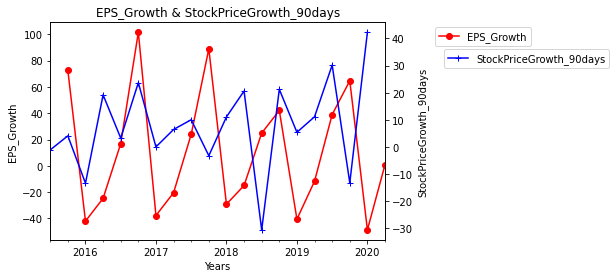

In [9]:
plot_data(financial_ratios, 'AAPL', 'EPS_Growth', 'StockPriceGrowth_90days')

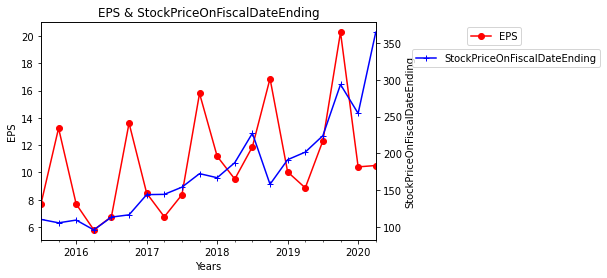

In [10]:
plot_data(financial_ratios, 'AAPL', 'EPS', 'StockPriceOnFiscalDateEnding')

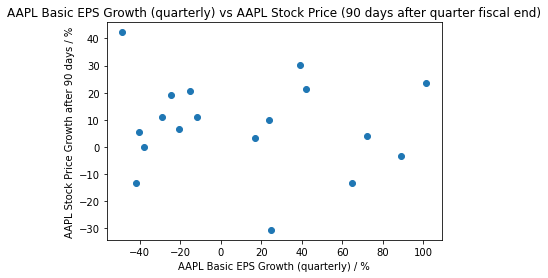

In [203]:
# check the correlation of the EPS growth in each quarter vs stock prices after 90 days for Apple
plt.scatter(financial_ratios[financial_ratios.Symbol == 'AAPL'].EPS_Growth, financial_ratios[financial_ratios.Symbol == 'AAPL'].StockPriceGrowth_90days)
plt.title('AAPL Basic EPS Growth (quarterly) vs AAPL Stock Price (90 days after quarter fiscal end)')
plt.ylabel('AAPL Stock Price Growth after 90 days / %')
plt.xlabel('AAPL Basic EPS Growth (quarterly) / %')
plt.show()

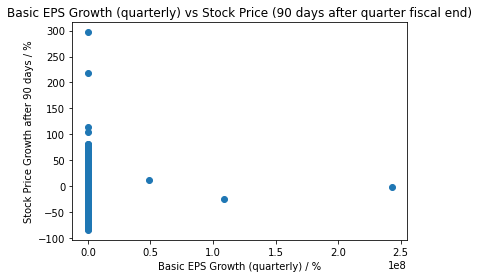

In [204]:
# check the correlation of the EPS growth in each quarter vs stock prices after 90 days for all symbols
plt.scatter(financial_ratios.EPS_Growth, financial_ratios.StockPriceGrowth_90days)
plt.title('Basic EPS Growth (quarterly) vs Stock Price (90 days after quarter fiscal end)')
plt.ylabel('Stock Price Growth after 90 days / %')
plt.xlabel('Basic EPS Growth (quarterly) / %')
plt.show()

### Outliers Elmination

In [83]:
def eliminate_outliers_iqr(df, cols, outlier_range):
    """
    This function aims to eliminate the outliers of the selected columns in a dataframe using the interquartile
    range method. Before eliminating the outliers, any infinite values and NaNs will be removed from the dataframe.
    This function returns the original dataframe with the inlier rows only and another with outliers only.

    :param df: a pandas DataFrame with the selected cols to be processed
    :type df: pd.DataFrame
    :param cols: a list of columns names to be processed
    :type cols: list
    :param outlier_range: the range out of the interquartile range that decide which data point is outlier
    :type outlier_range: float
    :return: 1 dataframe only with rows that consists of the inliers in the selected columns.
    1 dataframe only with rows that consists of the outliers in the selected columns.
    rtype: pd.DataFrame
    """
    # eliminate NaNs and infinite values
    df_clean = df.replace([np.inf, -np.inf], np.nan)
    df_clean = df_clean[cols].dropna()

    # calculate interquartile range
    q1 = df_clean.quantile(0.25)
    q3 = df_clean.quantile(0.75)
    iqr = q3 - q1

    # outliers selection criteria
    selection = ((df_clean < (q1 - outlier_range * iqr)) | (df_clean > (q3 + outlier_range * iqr)))

    # select the outliers and inliers
    df_outliers = df_clean[selection.any(axis=1)]
    df_inliers = df_clean[~selection.any(axis=1)]

    # select only the inlier rows in the original dataframe
    inliers_index_list = df_inliers.index.tolist()
    df_clean_inliers = df.loc[inliers_index_list]

    # select only the outlier rows in the original dataframe
    outliers_index_list = df_outliers.index.tolist()
    df_clean_outliers = df.loc[outliers_index_list]

    return df_clean_inliers, df_clean_outliers

In [170]:
# elminate outliers
financial_ratios_iqr, financial_ratios_iqr_outliers = eliminate_outliers_iqr(financial_ratios, ['EPS_Growth', 'StockPriceGrowth_45days', 'StockPriceGrowth_90days'], 5)

In [171]:
financial_ratios_iqr

,Symbol,fiscalDateEnding,StockPriceOnFiscalDateEnding,StockPrice45daysLater,StockPrice90daysLater,EPS,EPS_Growth,StockPriceGrowth_90days,StockPriceGrowth_45days
1,A,2020-04-30,76.66,86.96,97.10,1.311688,-48.398049,26.663188,13.435951
2,A,2020-01-31,82.56,64.13,76.66,2.541935,4.166944,-7.146318,-22.323159
3,A,2019-10-31,75.75,84.45,87.24,2.440252,-0.984557,15.168317,11.485149
4,A,2019-07-31,69.41,77.15,76.17,2.464516,7.314782,9.739231,11.151131
5,A,2019-04-30,78.50,69.97,70.37,2.296530,-63.774974,-10.356688,-10.866242
...,...,...,...,...,...,...,...,...,...
9916,ZTS,2017-03-31,53.37,60.00,62.50,1.937604,55.025709,17.106989,12.422709
9917,ZTS,2016-12-31,53.59,55.02,53.37,1.249860,-35.383718,-0.410524,2.668408
9918,ZTS,2016-09-30,52.01,48.96,53.62,1.934280,6.944457,3.095559,-5.864257
9919,ZTS,2016-06-30,47.46,52.38,51.75,1.808677,10.031581,9.039191,10.366625


In [172]:
financial_ratios_iqr_outliers

,Symbol,fiscalDateEnding,StockPriceOnFiscalDateEnding,StockPrice45daysLater,StockPrice90daysLater,EPS,EPS_Growth,StockPriceGrowth_90days,StockPriceGrowth_45days
21,AAL,2020-03-31,12.19,9.04,13.32,-21.197175,-648.108914,9.269893,-25.840853
89,ABBV,2018-03-31,91.46,104.18,92.65,6.974937,5275.396424,1.301115,13.907719
101,ABC,2020-03-31,88.50,85.75,98.99,18.888986,417.872209,11.853107,-3.107345
104,ABC,2019-06-30,85.59,86.34,82.33,5.796317,1022.348750,-3.808856,0.876271
111,ABC,2017-09-30,83.30,75.40,91.82,-6.322883,-787.627957,10.228091,-9.483794
...,...,...,...,...,...,...,...,...,...
9853,ZBH,2017-12-31,124.06,117.70,106.40,24.145098,1146.356275,-14.235048,-5.126552
9858,ZBH,2016-09-30,130.02,97.99,103.50,3.129064,-597.351233,-20.396862,-24.634672
9861,ZBH,2015-12-31,102.59,93.62,106.70,2.225263,416.220958,4.006238,-8.743542
9872,ZBRA,2018-03-31,137.40,154.45,143.25,8.074074,2625.000000,4.257642,12.409025


In [173]:
financial_ratios_iqr[['EPS_Growth', 'StockPriceGrowth_45days', 'StockPriceGrowth_90days']].min()

EPS_Growth                -370.091661
StockPriceGrowth_45days    -63.132732
StockPriceGrowth_90days    -81.715460
dtype: float64

In [174]:
financial_ratios_iqr_outliers[['EPS_Growth', 'StockPriceGrowth_45days', 'StockPriceGrowth_90days']].min()

EPS_Growth                -316346.213559
StockPriceGrowth_45days       -79.362192
StockPriceGrowth_90days       -83.939039
dtype: float64

In [175]:
financial_ratios_iqr[['EPS_Growth', 'StockPriceGrowth_45days', 'StockPriceGrowth_90days']].max()

EPS_Growth                 351.666667
StockPriceGrowth_45days     55.134252
StockPriceGrowth_90days     81.313869
dtype: float64

In [176]:
financial_ratios_iqr_outliers[['EPS_Growth', 'StockPriceGrowth_45days', 'StockPriceGrowth_90days']].max()

EPS_Growth                 2.429837e+08
StockPriceGrowth_45days    1.538278e+02
StockPriceGrowth_90days    2.967302e+02
dtype: float64

### Check correlation

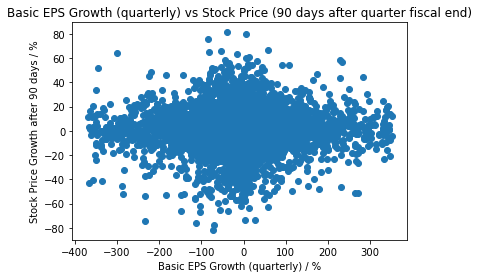

In [200]:
plt.scatter(financial_ratios_iqr.EPS_Growth, financial_ratios_iqr.StockPriceGrowth_90days)
plt.title('Basic EPS Growth (quarterly) vs Stock Price (90 days after quarter fiscal end)')
plt.ylabel('Stock Price Growth after 90 days / %')
plt.xlabel('Basic EPS Growth (quarterly) / %')
plt.show()

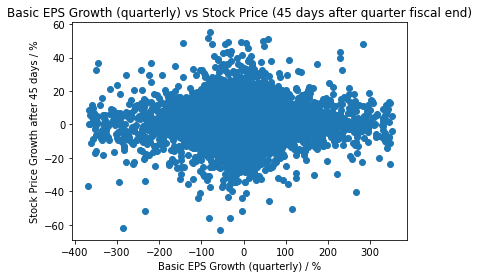

In [201]:
plt.scatter(financial_ratios_iqr.EPS_Growth, financial_ratios_iqr.StockPriceGrowth_45days)
plt.title('Basic EPS Growth (quarterly) vs Stock Price (45 days after quarter fiscal end)')
plt.ylabel('Stock Price Growth after 45 days / %')
plt.xlabel('Basic EPS Growth (quarterly) / %')
plt.show()

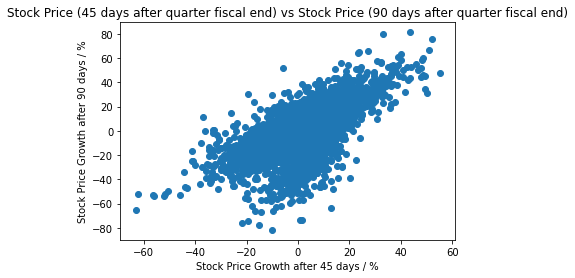

In [202]:
plt.scatter(financial_ratios_iqr.StockPriceGrowth_45days, financial_ratios_iqr.StockPriceGrowth_90days)
plt.title('Stock Price (45 days after quarter fiscal end) vs Stock Price (90 days after quarter fiscal end)')
plt.xlabel('Stock Price Growth after 45 days / %')
plt.ylabel('Stock Price Growth after 90 days / %')
plt.show()

#### Check correlation within outliers

In [186]:
# abstract only the signs of the values to check for the correlation
financial_ratios_iqr_outliers_signs = np.sign(financial_ratios_iqr_outliers[['EPS_Growth', 'StockPriceGrowth_90days']])
financial_ratios_iqr_outliers_signs

,EPS_Growth,StockPriceGrowth_90days
21,-1.0,1.0
89,1.0,1.0
101,1.0,1.0
104,1.0,-1.0
111,-1.0,1.0
...,...,...
9853,1.0,-1.0
9858,-1.0,-1.0
9861,1.0,1.0
9872,1.0,1.0


In [188]:
# compute correlation
financial_ratios_iqr_outliers_signs['correlation'] = financial_ratios_iqr_outliers_signs['EPS_Growth']*financial_ratios_iqr_outliers_signs['StockPriceGrowth_90days']

In [189]:
financial_ratios_iqr_outliers_signs

,EPS_Growth,StockPriceGrowth_90days,correlation
21,-1.0,1.0,-1.0
89,1.0,1.0,1.0
101,1.0,1.0,1.0
104,1.0,-1.0,-1.0
111,-1.0,1.0,-1.0
...,...,...,...
9853,1.0,-1.0,-1.0
9858,-1.0,-1.0,1.0
9861,1.0,1.0,1.0
9872,1.0,1.0,1.0


In [191]:
# see how many queries have positive and negative correlations 
financial_ratios_iqr_outliers_signs['correlation'].value_counts()

-1.0    291
 1.0    283
-0.0      1
Name: correlation, dtype: int64

# Conclusion

As we can see from the plots above, there is no clear correlation between the stock price and quarterly basic eps. Interestingly, there is a positive correlation between the stock price on the 45th day after quarter fiscal ending date and the stock on the 90th days after quarter fiscal ending date.

Improvements:
1. More Data! More data would definitely help. As the financial statements available are only from 2015 till partial 2020, the analyzed data is really too few as compare to the whole history of the US financial stock markets. Furthermore, they are just 500 companies being analyzed here. There are more than 2000 companies listed in the NYSE. Importing more companies to the analysis would help as well.
2. Analyze each sector differently to see if there is a clearer correlation between basic EPS and stock prices.
3. Use diluted EPS instead of basic EPS.